In [1]:
import pandas as pd
import phate
import scprep
import scanpy as sc
import numpy as np
from scipy.spatial.distance import pdist, squareform, cdist
# matplotlib settings for Jupyter notebooks only
%matplotlib inline
DATA_PATH = '/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/sea_ad/data/'

In [2]:
adata = sc.read_h5ad(DATA_PATH + 'SEAAD_MTG_RNAseq_subset_2000cellsperbraak_PREPROCESSED.h5ad')

In [3]:
phate_operator = phate.PHATE()
Y_phate = phate_operator.fit_transform(adata[:, adata.var['highly_variable']])

Calculating PHATE...


  Running PHATE on 14000 observations and 3515 variables.


  Calculating graph and diffusion operator...


    Calculating PCA...


    Calculated PCA in 3.47 seconds.


    Calculating KNN search...


    Calculated KNN search in 14.35 seconds.


    Calculating affinities...


    Calculated affinities in 0.16 seconds.


  Calculated graph and diffusion operator in 18.00 seconds.


  Calculating landmark operator...


    Calculating SVD...


    Calculated SVD in 1.02 seconds.


    Calculating KMeans...


    Calculated KMeans in 5.67 seconds.


  Calculated landmark operator in 7.51 seconds.


  Calculating optimal t...


    Automatically selected t = 16


  Calculated optimal t in 3.09 seconds.


  Calculating diffusion potential...


  Calculated diffusion potential in 0.65 seconds.


  Calculating metric MDS...


  Calculated metric MDS in 3.87 seconds.


Calculated PHATE in 33.68 seconds.


/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: xlabel='PHATE 1', ylabel='PHATE 2'>

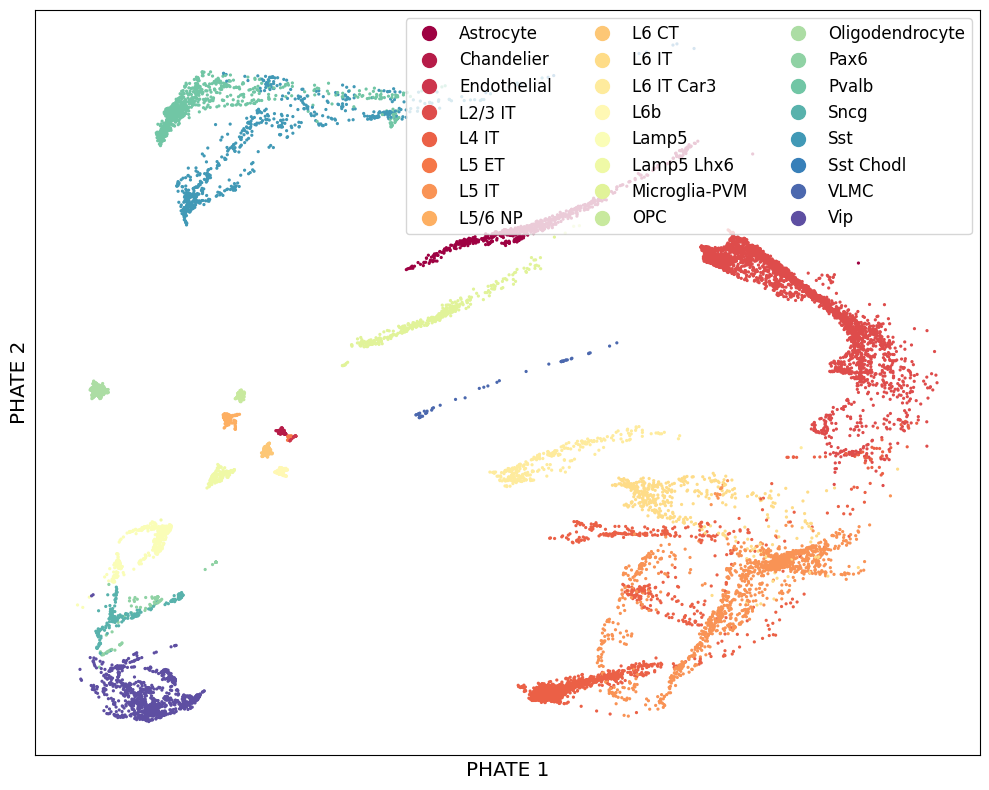

In [4]:
scprep.plot.scatter2d(Y_phate, figsize=(10,8),c=adata.obs['Subclass'], cmap='Spectral',
                      ticks=False, label_prefix="PHATE ")

In [5]:
pca_loadings = phate_operator.graph.data_nu
pca_components = phate_operator.graph.data_pca.components_

In [6]:
phate_operator = phate.PHATE()
Y_phate = phate_operator.fit_transform(pca_loadings)

Calculating PHATE...


  Running PHATE on 14000 observations and 100 variables.


  Calculating graph and diffusion operator...


    Calculating KNN search...


    Calculated KNN search in 14.42 seconds.


    Calculating affinities...


    Calculated affinities in 0.16 seconds.


  Calculated graph and diffusion operator in 14.60 seconds.


  Calculating landmark operator...


    Calculating SVD...


    Calculated SVD in 0.93 seconds.


    Calculating KMeans...


    Calculated KMeans in 7.61 seconds.


  Calculated landmark operator in 9.37 seconds.


  Calculating optimal t...


    Automatically selected t = 56


  Calculated optimal t in 3.36 seconds.


  Calculating diffusion potential...


  Calculated diffusion potential in 1.15 seconds.


  Calculating metric MDS...


  Calculated metric MDS in 3.93 seconds.


Calculated PHATE in 32.43 seconds.


In [7]:
colors = adata.obs['Subclass'].cat.codes.to_numpy().flatten()

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: xlabel='PHATE 1', ylabel='PHATE 2'>

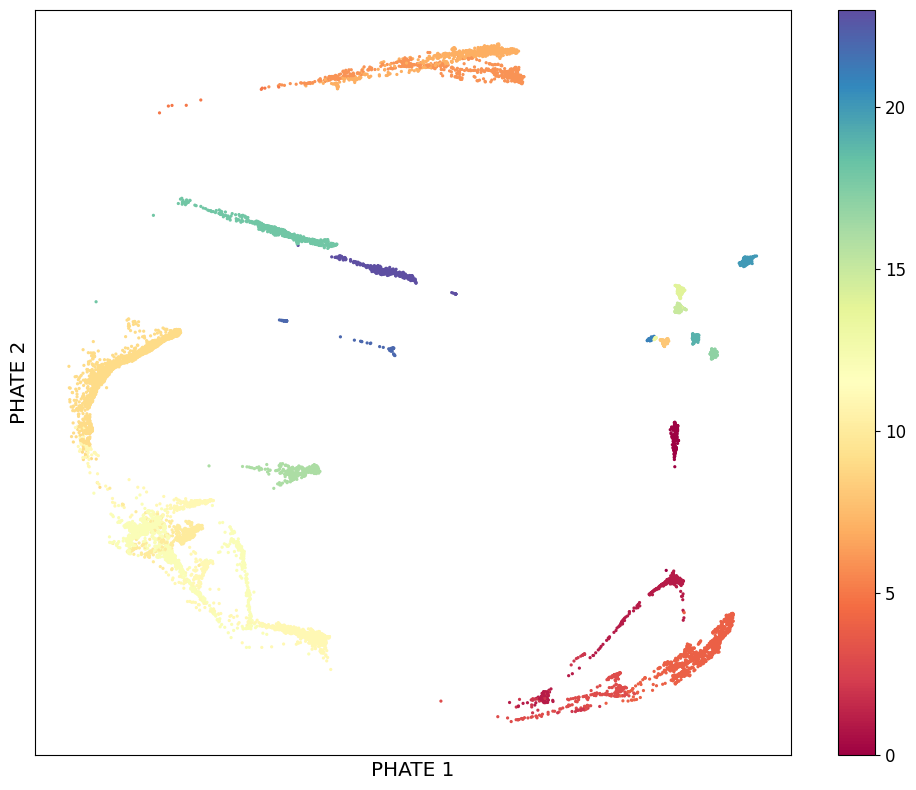

In [8]:
scprep.plot.scatter2d(Y_phate, figsize=(10,8),c=colors, cmap='Spectral',
                      ticks=False, label_prefix="PHATE ")

In [9]:
X_dist = squareform(pdist(phate_operator.diff_potential))

In [10]:
# np.save("../data/sea_ad_rnaseq_phate.npy", Y_phate)

In [11]:
# np.save("../data/sea_ad_rnaseq_pca.npy", pca_loadings)

In [12]:
# np.save("../data/sea_ad_rnaseq_pca_components.npy", pca_components)

In [13]:
# adata.obs['Subclass'].to_csv("../data/sea_ad_rnaseq_celltypes.csv")

In [14]:
np.savez(
    '../data/sea_ad.npz', 
    data=pca_loadings, 
    phate=Y_phate, 
    dist=X_dist, 
    colors=colors
)